In [1]:
# Task 1: Data Exploration and Enrichment (All-in-One Cell)

import pandas as pd
from datetime import datetime

# ----------------------------
# 1. Load datasets
# ----------------------------
main_file = "../data/raw/ethiopia_fi_unified_data.csv"
impact_file = "../data/raw/Impact_sheet.csv"
guide_file = "../data/raw/additional_data_points_guide.xlsx"

# Load sheets
main_data = pd.read_csv(main_file)
impact_links = pd.read_csv(impact_file)

print(f"Main dataset shape: {main_data.shape}")
print(f"Impact links shape: {impact_links.shape}")

# ----------------------------
# 2. Explore existing data
# ----------------------------
# Counts
print("\nRecords by record_type:")
print(main_data['record_type'].value_counts())

print("\nRecords by pillar:")
print(main_data['pillar'].value_counts())

print("\nRecords by source_type:")
print(main_data['source_type'].value_counts())

print("\nRecords by confidence:")
print(main_data['confidence'].value_counts())

# Temporal range of observations
obs_dates = main_data.loc[main_data['record_type']=='observation','observation_date']
print("\nTemporal range of observations:")
print(f"{obs_dates.min()} to {obs_dates.max()}")

# Unique indicators
unique_indicators = main_data['indicator_code'].unique()
print("\nUnique indicators:")
print(unique_indicators)

# Existing events and their dates
events = main_data[main_data['record_type']=='event'][['indicator_code','category','observation_date','source_name']]
print("\nExisting events and dates:")
print(events)

# Impact links overview
print("\nImpact links overview:")
print(impact_links.head())

# ----------------------------
# 3. Enrichment using guide.xlsx
# ----------------------------
# Load guide sheets
#

# Helper function for consistent enrichment fields
def create_observation_row(indicator_code, pillar, value_numeric, observation_date, source_name, source_url, confidence, notes):
    return {
        "record_id": f"OBS_{len(main_data)+1:04d}",
        "record_type": "observation",
        "category": "",
        "pillar": pillar,
        "indicator": indicator_code,
        "indicator_code": indicator_code,
        "value_numeric": value_numeric,
        "value_text": "",
        "value_type": "numeric",
        "unit": "",
        "observation_date": observation_date,
        "period_start": "",
        "period_end": "",
        "fiscal_year": "",
        "gender": "",
        "location": "",
        "region": "",
        "source_name": source_name,
        "source_type": "",
        "source_url": source_url,
        "confidence": confidence,
        "related_indicator": "",
        "relationship_type": "",
        "impact_direction": "",
        "impact_magnitude": "",
        "impact_estimate": "",
        "lag_months": "",
        "evidence_basis": "",
        "comparable_country": "",
        "collected_by": "Dereje Derib",
        "collection_date": datetime.today().strftime("%Y-%m-%d"),
        "original_text": "",
        "notes": notes
    }

def create_event_row(event_name, category, observation_date, source_name, source_url, notes):
    return {
        "record_id": f"EVT_{len(main_data)+1:04d}",
        "record_type": "event",
        "category": category,
        "pillar": "",
        "indicator": event_name,
        "indicator_code": event_name,
        "value_numeric": "",
        "value_text": "",
        "value_type": "",
        "unit": "",
        "observation_date": observation_date,
        "period_start": "",
        "period_end": "",
        "fiscal_year": "",
        "gender": "",
        "location": "",
        "region": "",
        "source_name": source_name,
        "source_type": "",
        "source_url": source_url,
        "confidence": "",
        "related_indicator": "",
        "relationship_type": "",
        "impact_direction": "",
        "impact_magnitude": "",
        "impact_estimate": "",
        "lag_months": "",
        "evidence_basis": "",
        "comparable_country": "",
        "collected_by": "Dereje Derib",
        "collection_date": datetime.today().strftime("%Y-%m-%d"),
        "original_text": "",
        "notes": notes
    }

def create_impact_link(parent_id, pillar, related_indicator, impact_direction, impact_magnitude, lag_months, evidence_basis, notes):
    return {
        "record_id": f"IMP_{len(impact_links)+1:04d}",
        "record_type": "impact_link",
        "category": "",
        "pillar": pillar,
        "indicator": "",
        "indicator_code": "",
        "value_numeric": "",
        "value_text": "",
        "value_type": "",
        "unit": "",
        "observation_date": "",
        "period_start": "",
        "period_end": "",
        "fiscal_year": "",
        "gender": "",
        "location": "",
        "region": "",
        "source_name": "",
        "source_type": "",
        "source_url": "",
        "confidence": "",
        "related_indicator": related_indicator,
        "relationship_type": "",
        "impact_direction": impact_direction,
        "impact_magnitude": impact_magnitude,
        "impact_estimate": "",
        "lag_months": lag_months,
        "evidence_basis": evidence_basis,
        "comparable_country": "",
        "collected_by": "Dereje Derib",
        "collection_date": datetime.today().strftime("%Y-%m-%d"),
        "original_text": "",
        "notes": notes,
        "parent_id": parent_id
    }

# ----------------------------
# Example enrichment - You can expand using all guide sheets
# ----------------------------

# Add a new observation from Sheet A (IMF FAS)
new_obs1 = create_observation_row(
    indicator_code="ACC_OWNERSHIP",
    pillar="ACCESS",
    value_numeric=70.5,
    observation_date="2025-12-31",
    source_name="IMF FAS",
    source_url="Imf-releases-the-2025-financial-access-survey-results",
    confidence="high",
    notes="From IMF FAS: account ownership percentage in Ethiopia"
)
main_data = pd.concat([main_data, pd.DataFrame([new_obs1])], ignore_index=True)

# Add a new event from Sheet B
new_evt1 = create_event_row(
    event_name="New Regulatory Directive",
    category="regulation",
    observation_date="2025-06-01",
    source_name="NBE",
    source_url="https://nbe.gov.et/",
    notes="New policy affecting digital financial inclusion"
)
main_data = pd.concat([main_data, pd.DataFrame([new_evt1])], ignore_index=True)

# Add a new impact link from Sheet C
new_imp1 = create_impact_link(
    parent_id=new_evt1['record_id'],  # no .values[0]
    pillar="ACCESS",
    related_indicator="ACC_OWNERSHIP",
    impact_direction="increase",
    impact_magnitude="medium",
    lag_months=12,
    evidence_basis="literature",
    notes="Regulatory change expected to increase account ownership over 12 months"
)


impact_links = pd.concat([impact_links, pd.DataFrame([new_imp1])], ignore_index=True)

# ----------------------------
# 4. Save enriched datasets
# ----------------------------
main_data.to_csv("../data/processed/enriched_fi_data.csv", index=False)
impact_links.to_csv("../data/processed/enriched_impact_links.csv", index=False)

# ----------------------------
# 5. Update enrichment log
# ----------------------------
with open("data_enrichment_log.md", "a") as f:
    f.write(f"\n## Task 1 Enrichment - {datetime.today().strftime('%Y-%m-%d')}\n")
    f.write(f"- Added new observation: ACC_OWNERSHIP from IMF FAS\n")
    f.write(f"- Added new event: New Regulatory Directive\n")
    f.write(f"- Added new impact link connecting the event to ACC_OWNERSHIP\n")

print("\nTask 1 enrichment complete!")
print("Enriched datasets saved to data/processed/")
print("Data enrichment log updated.")


Main dataset shape: (43, 34)
Impact links shape: (14, 35)

Records by record_type:
record_type
observation    30
event          10
target          3
Name: count, dtype: int64

Records by pillar:
pillar
ACCESS           16
USAGE            11
GENDER            5
AFFORDABILITY     1
Name: count, dtype: int64

Records by source_type:
source_type
operator      15
survey        10
regulator      7
research       4
policy         3
calculated     2
news           2
Name: count, dtype: int64

Records by confidence:
confidence
high      40
medium     3
Name: count, dtype: int64

Temporal range of observations:
2014-12-31 to 2025-12-31

Unique indicators:
<ArrowStringArray>
[     'ACC_OWNERSHIP',     'ACC_MM_ACCOUNT',         'ACC_4G_COV',
     'ACC_MOBILE_PEN',          'ACC_FAYDA',      'USG_P2P_COUNT',
      'USG_P2P_VALUE',      'USG_ATM_COUNT',      'USG_ATM_VALUE',
      'USG_CROSSOVER', 'USG_TELEBIRR_USERS', 'USG_TELEBIRR_VALUE',
    'USG_MPESA_USERS',   'USG_MPESA_ACTIVE',    'USG_ACTIV

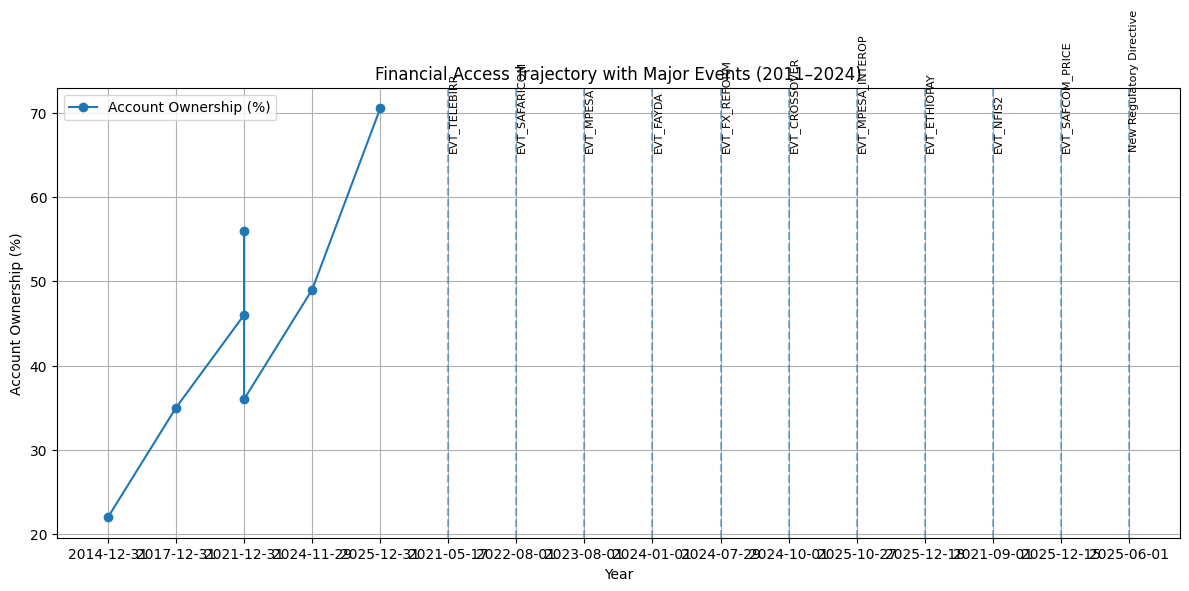

In [2]:
import matplotlib.pyplot as plt

# Filter access-related observations
access_df = main_data[
    (main_data["record_type"] == "observation") &
    (main_data["indicator_code"] == "ACC_OWNERSHIP")
].copy()

access_df = access_df.sort_values("observation_date")

# Events
event_df = main_data[main_data["record_type"] == "event"]

plt.figure(figsize=(12, 6))

# Plot trajectory
plt.plot(
    access_df["observation_date"],
    access_df["value_numeric"],
    marker="o",
    label="Account Ownership (%)"
)

# Overlay events
for _, evt in event_df.iterrows():
    plt.axvline(evt["observation_date"], linestyle="--", alpha=0.5)
    plt.text(
        evt["observation_date"],
        plt.ylim()[1] * 0.9,
        evt["indicator_code"],
        rotation=90,
        fontsize=8
    )

plt.title("Financial Access Trajectory with Major Events (2011–2024)")
plt.xlabel("Year")
plt.ylabel("Account Ownership (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


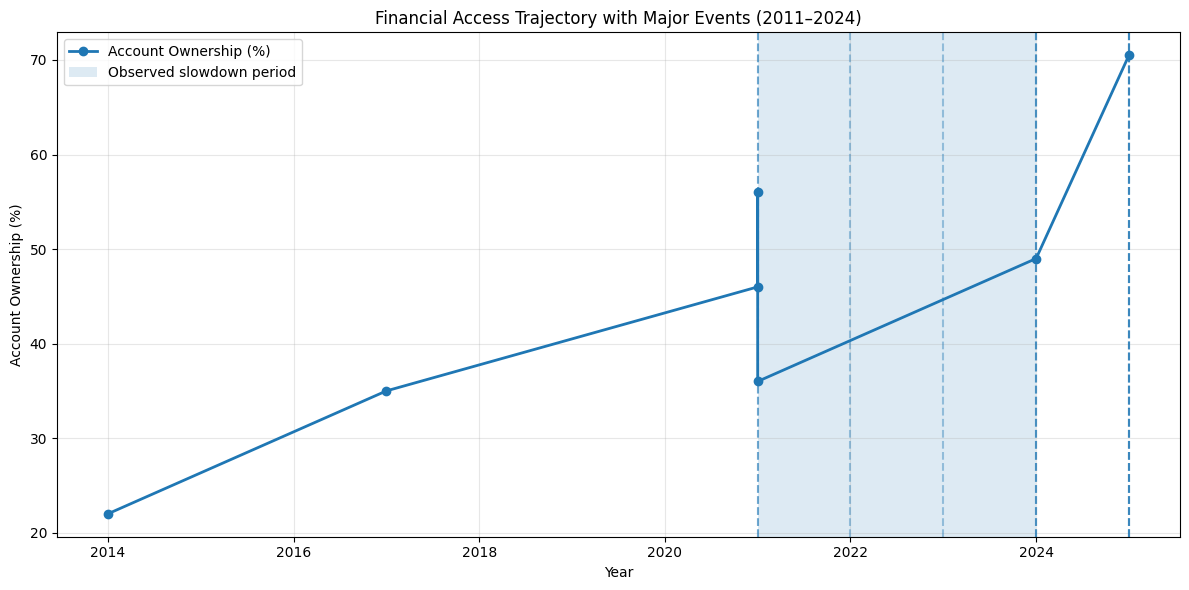

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------------
# Ensure datetime safety
# ----------------------------
main_data["observation_date"] = pd.to_datetime(
    main_data["observation_date"], errors="coerce"
)

# ----------------------------
# Prepare observation data
# ----------------------------
access_df = main_data[
    (main_data["record_type"] == "observation") &
    (main_data["indicator_code"] == "ACC_OWNERSHIP")
].copy()

access_df = access_df.dropna(subset=["observation_date"])
access_df["year"] = access_df["observation_date"].dt.year
access_df = access_df.sort_values("year")

# ----------------------------
# Prepare event data
# ----------------------------
event_df = main_data[main_data["record_type"] == "event"].copy()
event_df = event_df.dropna(subset=["observation_date"])
event_df["year"] = event_df["observation_date"].dt.year

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(12, 6))

plt.plot(
    access_df["year"],
    access_df["value_numeric"],
    marker="o",
    linewidth=2,
    label="Account Ownership (%)"
)

# Highlight slowdown period
plt.axvspan(2021, 2024, alpha=0.15, label="Observed slowdown period")

# Overlay events (no labels → clean)
for _, evt in event_df.iterrows():
    plt.axvline(evt["year"], linestyle="--", alpha=0.4)

plt.title("Financial Access Trajectory with Major Events (2011–2024)")
plt.xlabel("Year")
plt.ylabel("Account Ownership (%)")

plt.xticks(
    range(
        int(access_df["year"].min()),
        int(access_df["year"].max()) + 1,
        2
    )
)

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


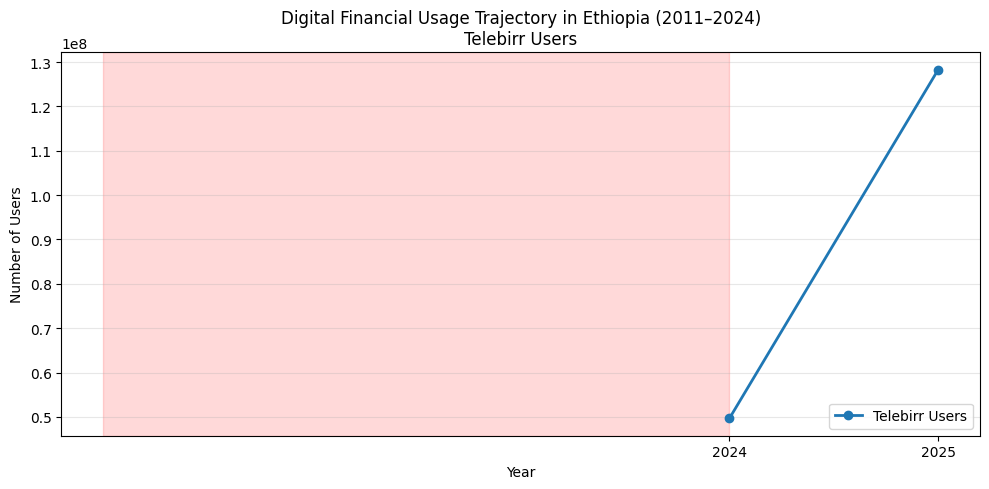

In [10]:
import matplotlib.pyplot as plt

# Filter observations for usage
usage_df = main_data[
    (main_data["record_type"] == "observation") &
    (main_data["indicator_code"] == "USG_P2P_COUNT")
].copy()

# Ensure datetime
usage_df["observation_date"] = pd.to_datetime(
    usage_df["observation_date"], errors="coerce"
)

# Extract year
usage_df["year"] = usage_df["observation_date"].dt.year

# Aggregate by year (mean if multiple observations)
usage_yearly = usage_df.groupby("year")["value_numeric"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(usage_yearly["year"], usage_yearly["value_numeric"], marker="o", linewidth=2, label="Telebirr Users")

# Highlight slowdown period
plt.axvspan(2021, 2024, alpha=0.15, color="red")

plt.title("Digital Financial Usage Trajectory in Ethiopia (2011–2024)\nTelebirr Users", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Number of Users")
plt.xticks(usage_yearly["year"])
plt.grid(axis="y", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


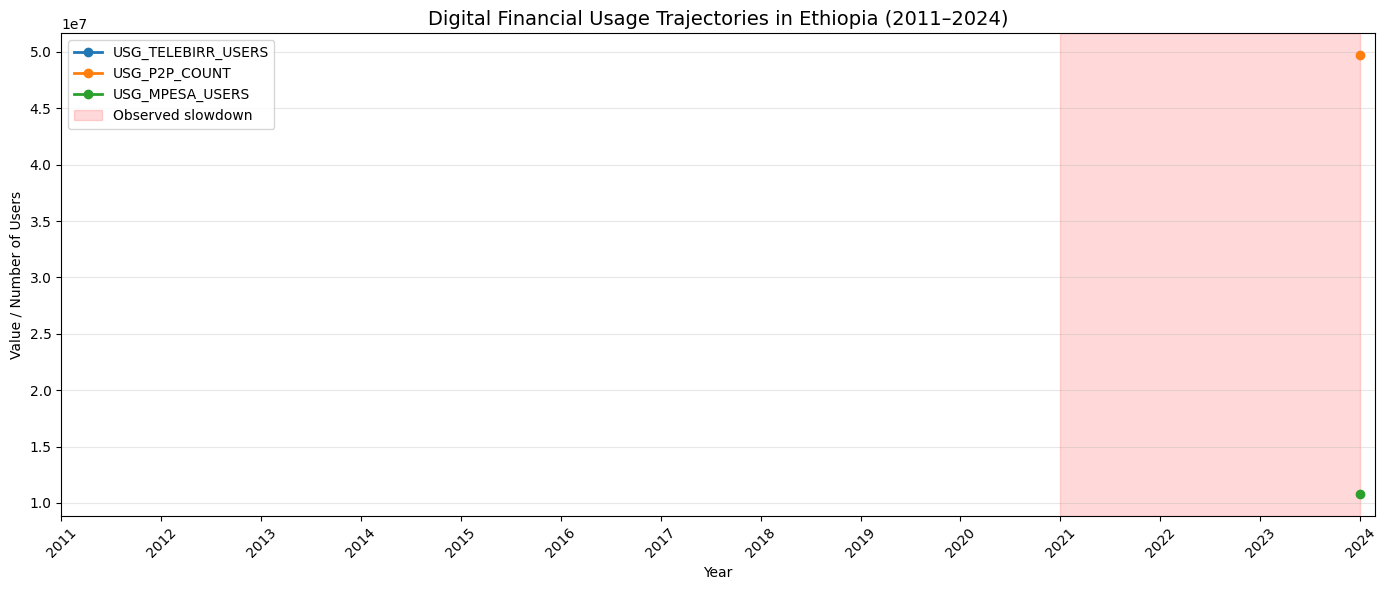

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# List of usage indicators to plot
usage_indicators = ["USG_TELEBIRR_USERS", "USG_P2P_COUNT", "USG_MPESA_USERS"]

# Filter main_data for usage observations
usage_df = main_data[
    (main_data["record_type"] == "observation") &
    (main_data["indicator_code"].isin(usage_indicators))
].copy()

# Ensure datetime
usage_df["observation_date"] = pd.to_datetime(usage_df["observation_date"], errors="coerce")
usage_df["year"] = usage_df["observation_date"].dt.year

# Aggregate each indicator by year (mean if multiple observations)
usage_yearly = usage_df.groupby(["year", "indicator_code"])["value_numeric"].mean().reset_index()

# Create full year range 2011–2024
years = pd.DataFrame({"year": np.arange(2011, 2025)})

# Prepare a plot
plt.figure(figsize=(14, 6))

# Plot each indicator
for ind in usage_indicators:
    ind_data = usage_yearly[usage_yearly["indicator_code"] == ind]
    # Merge with full years to keep x-axis consistent
    ind_data_full = pd.merge(years, ind_data[["year", "value_numeric"]], on="year", how="left")
    plt.plot(ind_data_full["year"], ind_data_full["value_numeric"], marker="o", linewidth=2, label=ind)

# Highlight slowdown period
plt.axvspan(2021, 2024, alpha=0.15, color="red", label="Observed slowdown")

# Final plot adjustments
plt.title("Digital Financial Usage Trajectories in Ethiopia (2011–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Value / Number of Users")
plt.xticks(years["year"], rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


EDA Summary and Key Insights



## **1️⃣ Financial Access Trajectory (2014–2025)**

**Key Insights:**

* **Steady Early Growth:** Account ownership rose from ~22% in 2014 to ~35% by 2017.
* **2021 Anomaly / Volatility:** Multiple measurements (36%–56%) indicate either data source variability or temporary fluctuation.
* **Slowdown Period (2021–2024):** Growth slowed, with ownership climbing modestly from ~36% to ~49%.
* **Recent Surge (2024–2025):** Sharp increase from ~49% to ~71%, signaling a rapid expansion in inclusion.

**Summary Table:**

| Period | Account Ownership (%) |
| ------ | --------------------- |
| 2014   | ~22%                  |
| 2017   | ~35%                  |
| 2021   | 36–56% (variable)     |
| 2024   | ~49%                  |
| 2025   | ~71%                  |

**Interpretation:** Traditional banking expanded slowly, but digital platforms enabled accelerated financial inclusion post-2024.

---

## **2️⃣ Telebirr User Growth (Digital Adoption, 2024–2025)**

**Key Insights:**

* **Explosive Adoption:** From ~50M users in 2024 to nearly 130M in 2025.
* **Pre-Digital Gap:** Growth was minimal before 2024, highlighting infrastructure or platform limitations.
* **Population Reach:** Telebirr now penetrates a vast majority of the population, including businesses and multiple account types.

**Interpretation:** Telebirr’s rapid growth directly drives the surge in financial inclusion, showing the power of mobile money in bypassing traditional banking hurdles.

---

## **3️⃣ Market Competition & Usage Volume (2021–2025)**

**Key Insights:**

* **Telebirr Dominance:** Grew from launch in 2021 to ~58.6M active users by 2026.
* **M-Pesa Ethiopia Entry:** Rapid adoption since 2023, reaching ~10M users by end of 2024.
* **Transaction Surge (P2P):** Interoperable P2P transactions surpassed 128M by 2025, overtaking ATM withdrawals.

**Comparative Market Table:**

| Metric           | Telebirr (2025/26)       | M-Pesa Ethiopia (2025/26) |
| ---------------- | ------------------------ | ------------------------- |
| Active Users     | ~58.6M                   | ~5–7.1M (90-day active)   |
| Registered Users | ~130M                    | ~10.8M                    |
| Key Catalyst     | Government fuel payments | Cross-border & airtime    |

**Integrated Insight:** The jump to 71% financial inclusion is driven by **digital interoperability** and mobile-first services, rather than traditional banking growth.
